In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

%matplotlib inline
sns.set_style('ticks')
sns.set_palette('colorblind')
from sklearn.model_selection import train_test_split

In [ ]:
!pip install fsspec

     |████████████████████████████████| 134 kB 5.3 MB/s 


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tridims/Project-Internship-BCC/a066cd59ba7af175b8d26bb76839284040987dbb/Dataset/heart_encode.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                734 non-null    int64  
 1   RestingBP          734 non-null    float64
 2   Cholesterol        734 non-null    int64  
 3   FastingBS          734 non-null    int64  
 4   RestingECG         734 non-null    int64  
 5   MaxHR              734 non-null    int64  
 6   ExerciseAngina     734 non-null    int64  
 7   Oldpeak            734 non-null    float64
 8   ST_Slope           734 non-null    int64  
 9   HeartDisease       734 non-null    int64  
 10  Sex_F              734 non-null    int64  
 11  Sex_M              734 non-null    int64  
 12  ChestPainType_ASY  734 non-null    int64  
 13  ChestPainType_ATA  734 non-null    int64  
 14  ChestPainType_NAP  734 non-null    int64  
 15  ChestPainType_TA   734 non-null    int64  
dtypes: float64(2), int64(14)
m

In [ ]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

#Pre-processing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify=y)

In [ ]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

# Hyperparameter Tuning

In [ ]:
from hyperopt import tpe
from hyperopt import STATUS_OK
from hyperopt import Trials
from hyperopt import hp
from hyperopt import fmin
from sklearn.linear_model import LogisticRegression

In [ ]:
N_FOLDS = 5
MAX_EVALS = 50
space = {
    'C' : hp.uniform('C', 0.01, 3),
    'max_iter' : hp.choice('max_iter', range(5,10000))
}

In [ ]:
def objective(params, n_folds = N_FOLDS):

    clf = LogisticRegression(**params)
    scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')

    # Extract the best score
    best_score = max(scores)

    # Loss must be minimized
    loss = 1 - best_score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [ ]:
# Algorithm
tpe_algorithm = tpe.suggest

# Trials object to track progress
bayes_trials = Trials()

# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)

In [ ]:
best

{'C': 1.621512783822278, 'max_iter': 8262}

In [ ]:
logre = LogisticRegression(C = 1.621512783822278, max_iter =  8262)
logre.fit(X_train,y_train)

LogisticRegression(C=1.621512783822278, max_iter=8262)

In [ ]:
y_predsk = logre.predict(X_test)

In [ ]:
cv = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(logre , X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.044)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predsk))

0.8571428571428571


#Logistic Regression from scratch

In [ ]:
class Logistic_Regression():

  # declaring learning rate & epochs (Hyperparametes)
  def __init__(self, learning_rate=0.01, epoch=1000):

    self.learning_rate = learning_rate
    self.epoch = epoch

  # fit function to train the model with dataset
  def fit(self, X, y):

    # jumlah titik data dalam kumpulan data (jumlah baris)  -->  m
    # jumlah fitur input dalam dataset (jumlah kolom)  --> n
    self.m, self.n = X.shape

    #Inisialisasi nilai theta
    self.theta = np.zeros(self.n) 

    self.X = X

    self.y = y

    # Mengimplementasikan gradient descent 
    # untuk mengoptimasikan nilai weight dan bias

    for i in range(self.epoch):     
      self.gradientDescent()

  # Fungsi sigmoid
  def sigmoidF(self):
    return 1 / (1 + np.exp( - (self.X.dot(self.theta)))) 

  def gradientDescent(self):
    # Y_hat formula (sigmoid function)
    Y_hat = self.sigmoidF()

    """
    turunan cost function terhadap weight dan bias 
    untuk diimplementasikan dalam gradient descent 
    """
    dT = (1/self.m)*np.dot(self.X.T, (Y_hat - self.y))

    # Memperbaharui weight dan bias

    self.theta = self.theta - self.learning_rate * dT

  # Sigmoid Equation & Decision Boundary
  def predict(self, X):
    y_pred = 1 / (1 + np.exp(-(X.dot(self.theta))))
    y_pred = np.where( y_pred > 0.5, 1, 0)
    return y_pred

Memprediksi dengan fungsi sigmoid dan menggunakan Decision boundry dimana jika y_pred > 0.5 maka akan dilabelkan sebagai 1 dan sebaliknya (1 memiliki penyakit jantung dan 0 tidak memiliki penyakit jantung).


In [ ]:
classifier = Logistic_Regression(learning_rate=1.621512783822278, epoch=8262)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

#Cross Validation dengan Kfold

In [ ]:
model = Logistic_Regression(learning_rate=1.621512783822278, epoch=8262)

In [ ]:
kf = KFold(n_splits=5, random_state=0,shuffle=True)
scoresAccuracy = []
scoresRecall = []
scoresPrecision = []
scoresF1 = []
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    Y_train, Y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    x_train=(x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train)).values
    x_test=(x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test)).values
    model.fit(x_train, Y_train)
    y_pred_test = classifier.predict(x_test)
    test_data_accuracy = accuracy_score( Y_test, y_pred_test)
    test_data_recall = recall_score(Y_test, y_pred_test)
    test_data_precision  = precision_score( Y_test, y_pred_test)
    test_data_f1_score  = f1_score( Y_test, y_pred_test)
    scoresAccuracy.append(test_data_accuracy)
    scoresRecall.append(test_data_recall)
    scoresPrecision.append(test_data_precision)
    scoresF1.append(test_data_f1_score)


In [ ]:
print('Accuracy Scores Test Data: %.2f (%.2f)' % (mean(scoresAccuracy)*100, std(scoresAccuracy)*100))
print('Recall Scores Test Data: %.2f (%.2f)' % (mean(scoresRecall)*100, std(scoresRecall)*100))
print('Precision Scores Test Data: %.2f (%.2f)' % (mean(scoresPrecision)*100, std(scoresPrecision)*100))
print('F1 Scores Test Data: %.2f (%.2f)' % (mean(scoresF1)*100, std(scoresF1)*100))

Accuracy Scores Test Data: 85.69 (2.11)
Recall Scores Test Data: 86.20 (2.83)
Precision Scores Test Data: 84.00 (4.04)
F1 Scores Test Data: 85.03 (2.85)


# Analisa Model

F1 Score dan Recall merupakan metrik yang penting

In [ ]:
print('Accuracy score of the test data  :', accuracy_score(y_test, y_pred))
print('Recall score of the test data    :', recall_score(y_test,y_pred))
print('Precision score of the test data :', precision_score(y_test, y_pred))
print('F1 score of the test data        :', f1_score(y_test, y_pred))

Accuracy score of the test data  : 0.8571428571428571
Recall score of the test data    : 0.8714285714285714
Precision score of the test data : 0.8356164383561644
F1 score of the test data        : 0.8531468531468531


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        77
           1       0.84      0.87      0.85        70

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147



[[65 12]
 [ 9 61]]


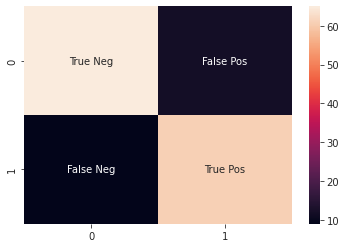

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=labels, fmt="")